<font size="5"><center>DIGITAL ASSIGNMENT 01</center></font>
<br>
<font size="3"><center>Name: Ayushi Dey</center></font>
<font size="3"><center>Register No.: 22MDT0076</center></font>
<font size="3"><center>Course Code: MAT6005</center></font>

<h3>Import Necessary Libraries and the Dataset</h3>

In [1]:
# Importing libraries
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/breast-cancercsv/breast-cancer (1).csv")

<h3>Descriptive Statistics</h3>

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#Dimensions of the dataset (row,column)
df.shape

(569, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#Check if any null value is present in the dataset
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
#Check if any duplicate entry is present in the dataset
df.duplicated().sum()

0

In [8]:
#Five number summary of each feature
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [9]:
#Convert data to numeric values
le = LabelEncoder()
df.diagnosis = le.fit_transform(df.diagnosis)

#Dropping the 'id' column
df.drop(['id'],axis=1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<b>Observations:</b><br>
    1. There are 569 samples of data and each sample has 30 features.<br>
    2. Each feature is of float data type.<br>
    3. In the diagnosis column dataset 1 represents malignant and 0 represents benign.<br>
    4. There is no null value in the dataset.

<h3>Data Visualization</h3>

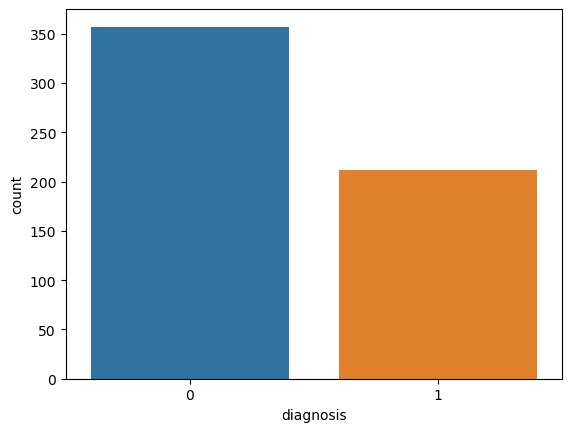

In [10]:
# diagnosis countplot
sns.countplot(x = 'diagnosis', data = df);

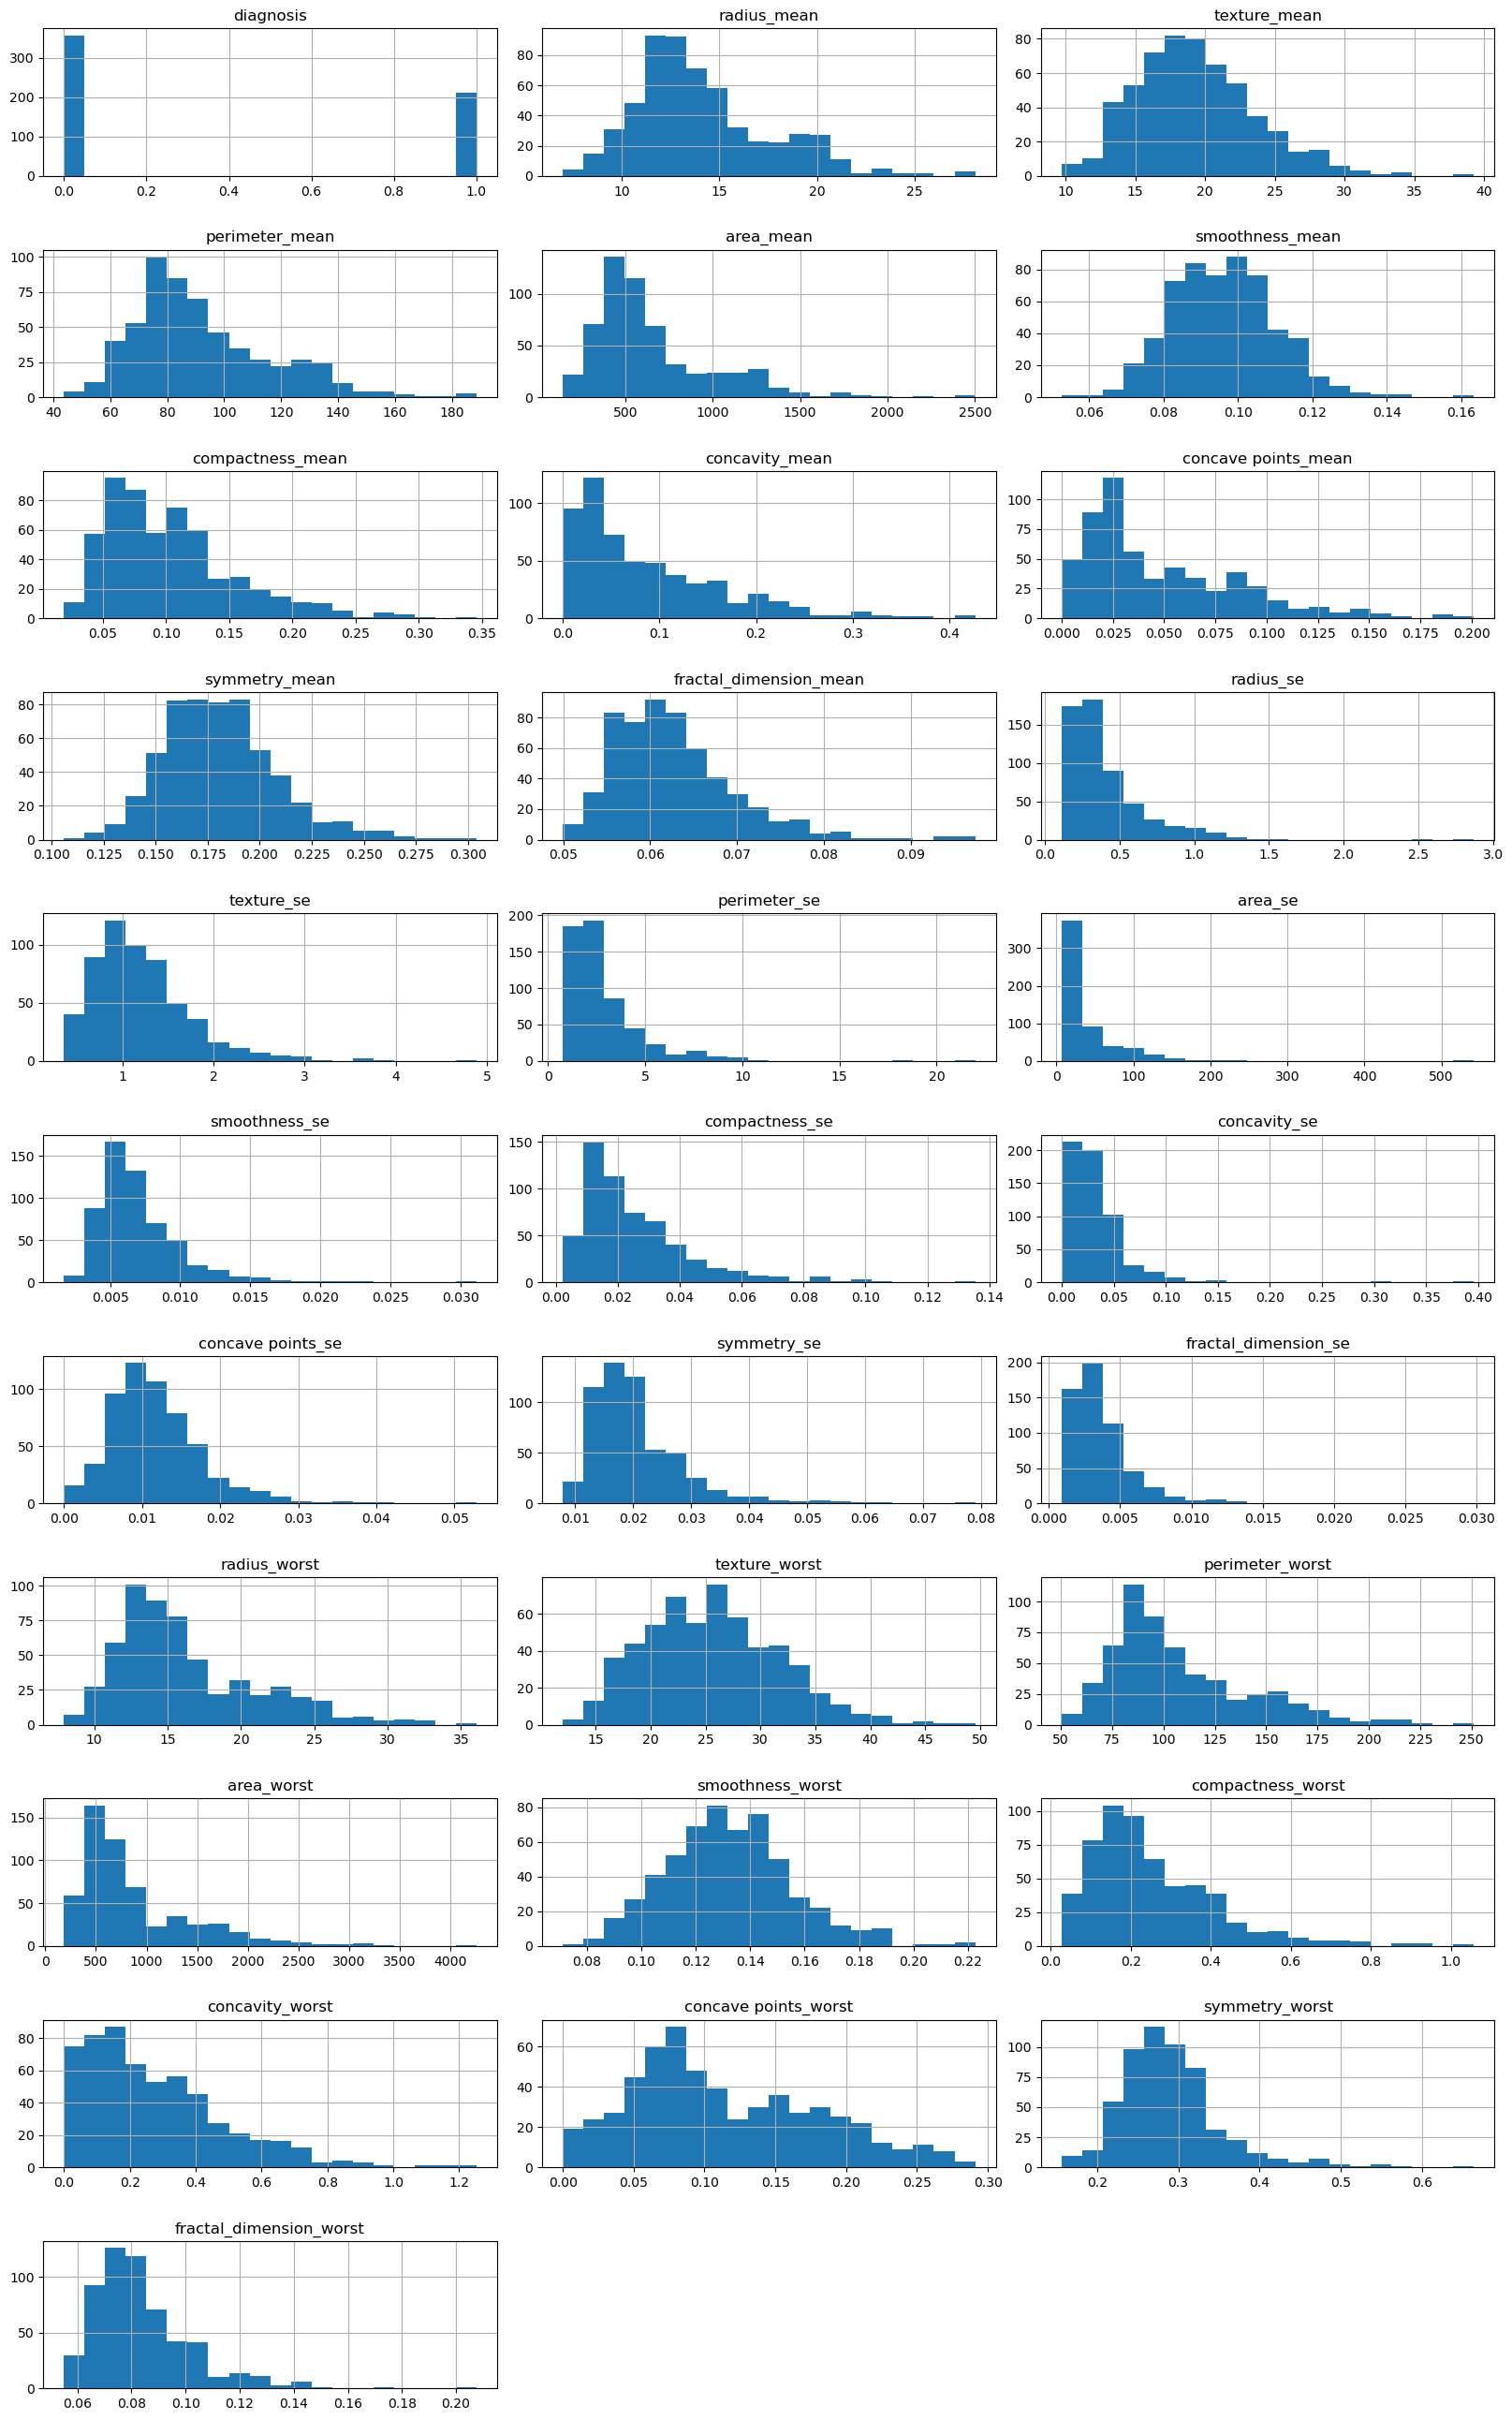

In [11]:
# Histogram of each feature
import itertools

col = df.columns[1:]
plt.subplots(figsize = (20, 45))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length//2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    df[i].hist(bins = 20)
    plt.title(i)
plt.show()

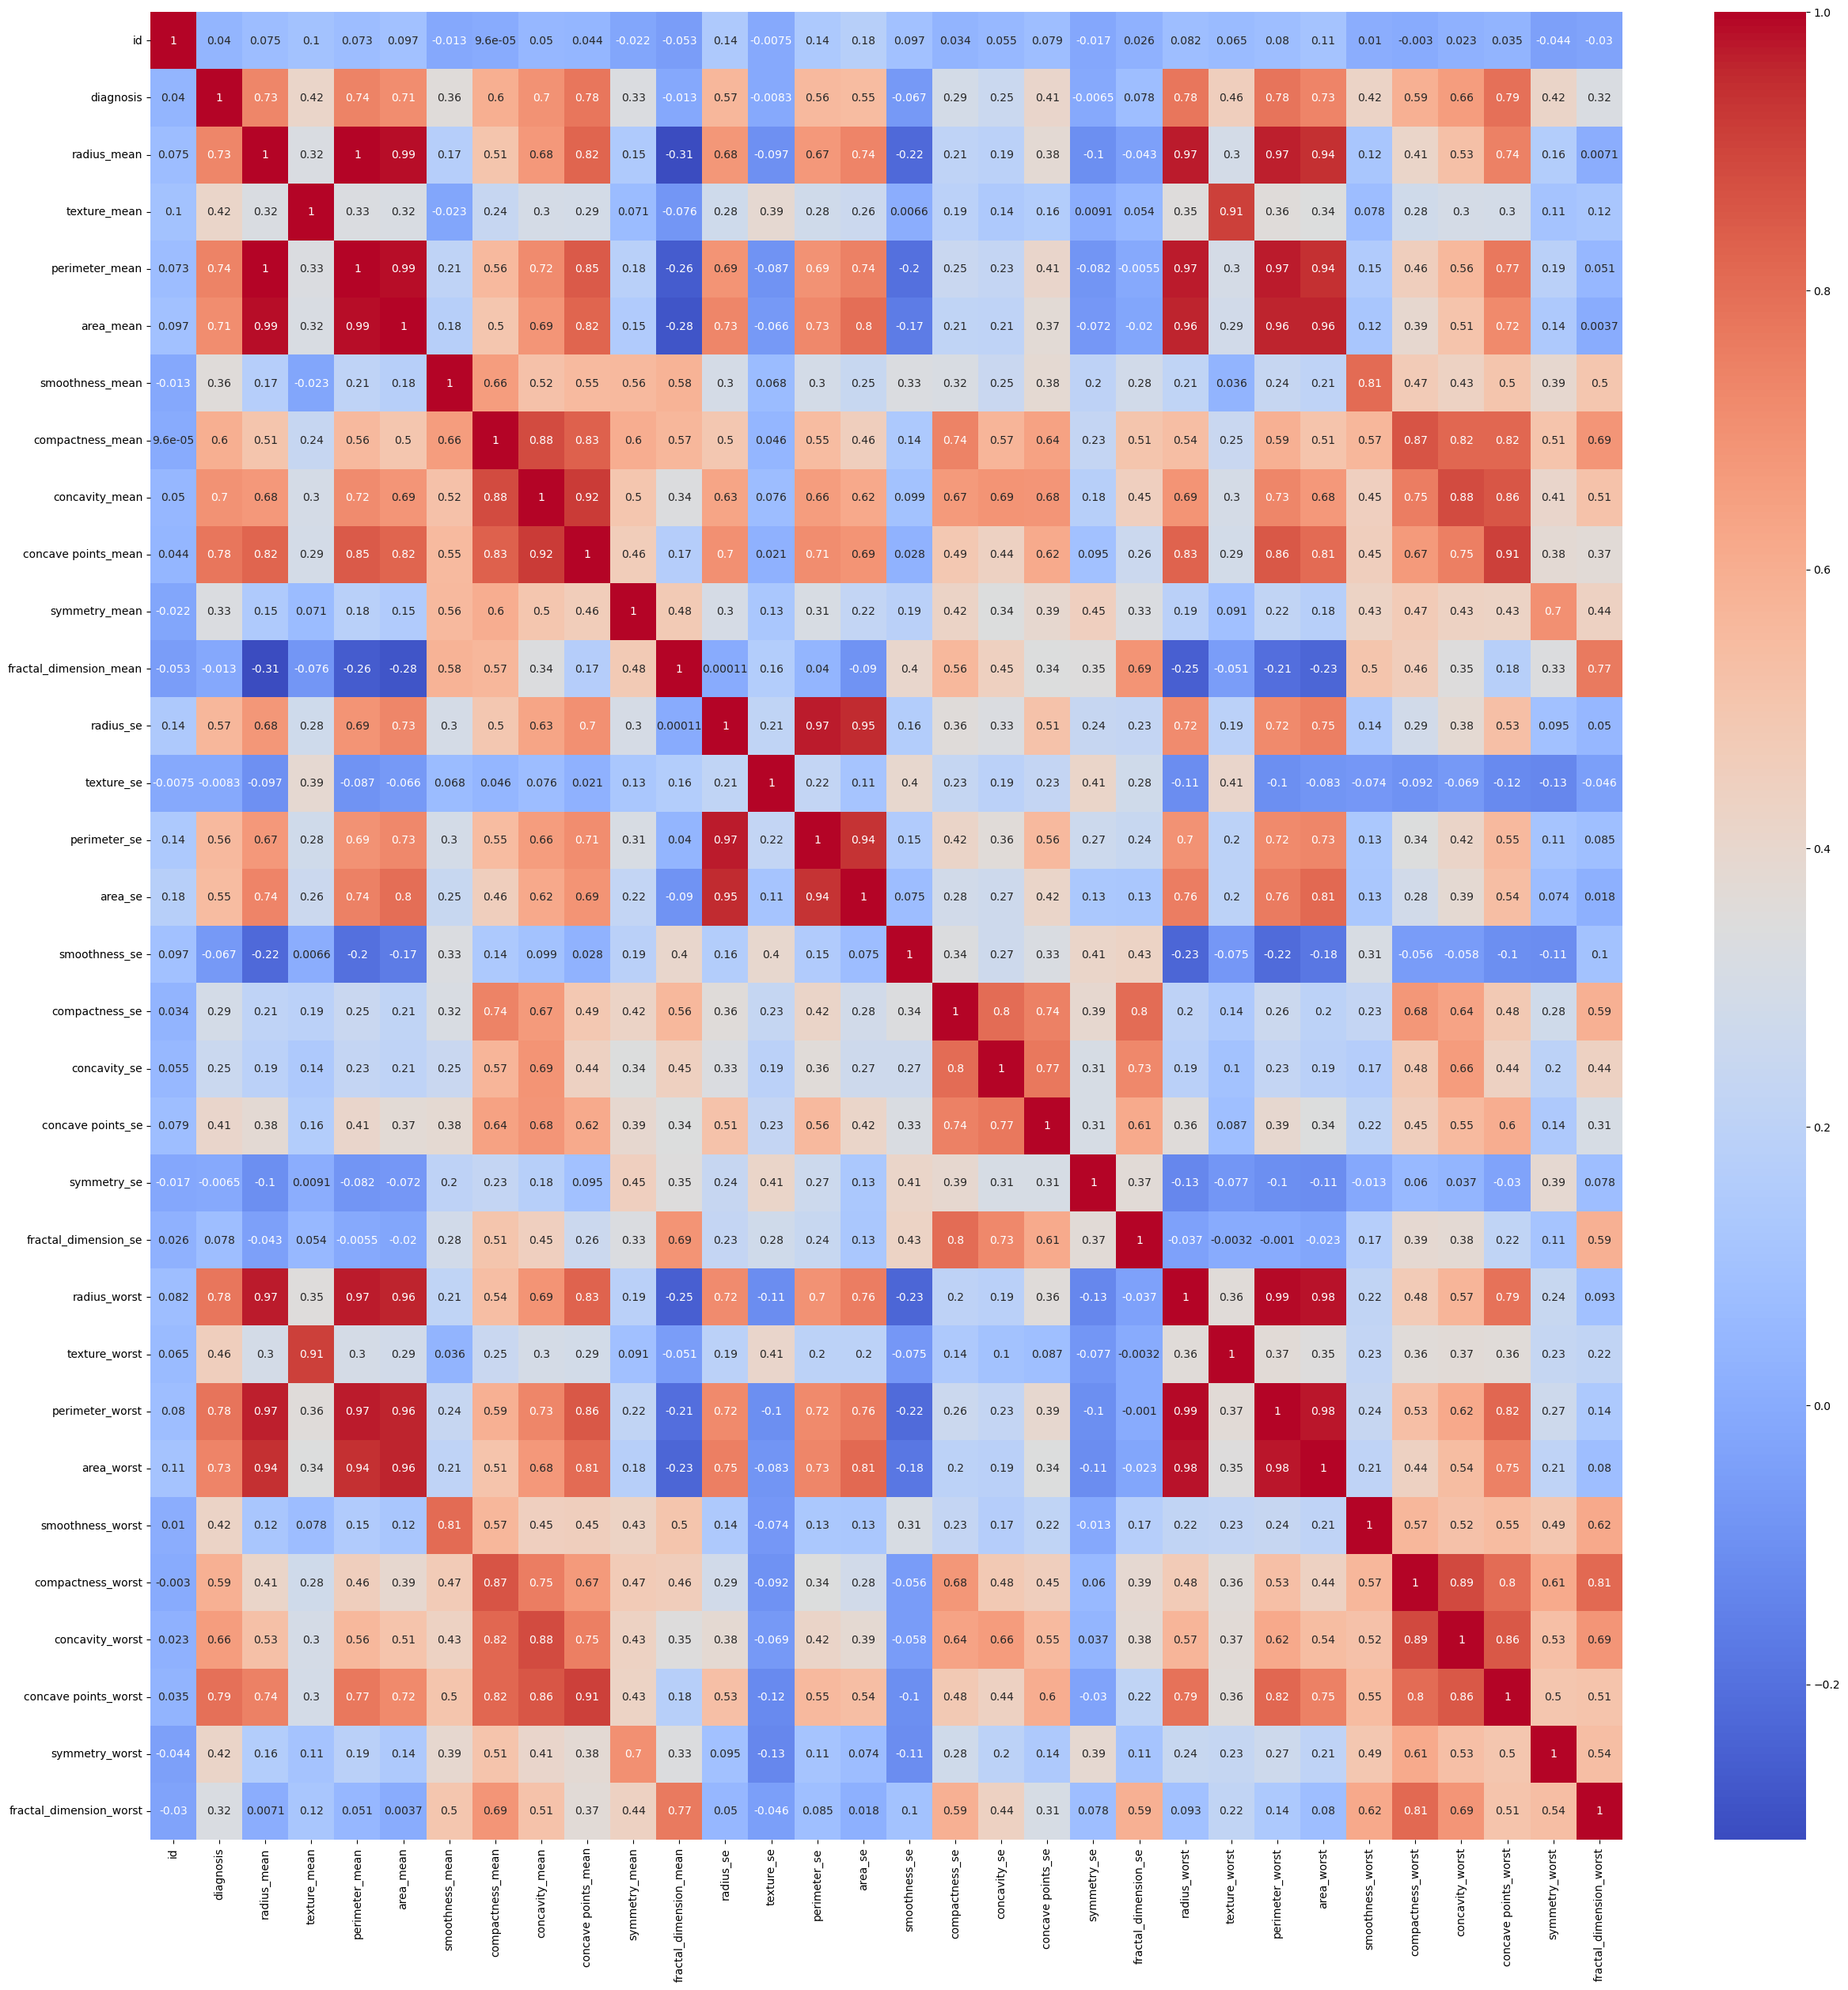

In [12]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(30,30))
# Heatmap
sns.heatmap(df.corr(), annot = True,ax = ax, cmap='coolwarm')
plt.show()

<h3>Data Pre-Processing</h3>

<h5>Outlier Detection and Treatment</h5>

In [13]:
#Function to detect outliers using z-score capping
def outlier_detect(col):
    mean = np.mean(col)
    sd = np.std(col)
    upp_bd = mean + 3*sd
    low_bd = mean - 3*sd
    return upp_bd,low_bd

In [14]:
#Calculate the upper and lower bound for each feature
upp_lis = []
low_lis = []
col = df.columns[1:]
for i in col:
  upp,low = outlier_detect(df[i])
  upp_lis.append(upp)
  low_lis.append(low)

d = {'Upper Bound':upp_lis, 'Lower Bound': low_lis}
outlier_df = pd.DataFrame(d,index=col)
outlier_df

,Upper Bound,Lower Bound
diagnosis,1.823061,-1.077894
radius_mean,24.690144,3.564439
texture_mean,32.181412,6.397885
perimeter_mean,164.801891,19.136176
area_mean,1709.703366,-399.925158
smoothness_mean,0.138516,0.054205
compactness_mean,0.262640,-0.053958
concavity_mean,0.327748,-0.150150
concave points_mean,0.165225,-0.067387
symmetry_mean,0.263332,0.098991


In [15]:
#Count the number of outliers for each feature
count_lis = []
for i in col:
  upp,low = outlier_df.loc[i]
  count = sum((df[i]>upp)|(df[i]<low))
  count_lis.append(count)

d = {'Outlier Count':count_lis}
outlier_count_df = pd.DataFrame(d, index = col)
outlier_count_df

,Outlier Count
diagnosis,0
radius_mean,5
texture_mean,4
perimeter_mean,7
area_mean,8
smoothness_mean,5
compactness_mean,9
concavity_mean,9
concave points_mean,6
symmetry_mean,5


In [16]:
#Treat outliers by deletion
count_lis = []
for i in col:
  upp,low = outlier_detect(df[i])
  df[i] = np.where(df[i]>upp,upp,np.where(df[i]<low,low,df[i]))

In [17]:
#Count number of outliers after outlier treatment
count_lis = []
for i in col:
  upp,low = outlier_df.loc[i]
  count = sum((df[i]>upp)|(df[i]<low))
  count_lis.append(count)

d = {'Outlier Count':count_lis}
outlier_count_df1 = pd.DataFrame(d, index = col)
outlier_count_df1

,Outlier Count
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


<h5>Split the Dataset</h5>

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('diagnosis',axis=1),df.diagnosis,test_size = 0.2, random_state = 42)

In [19]:
#The shape of the training and testing dataset
print(f'The shape of X_train , X_test, y_train and y_test are: {X_train.shape}, {y_train.shape}, {X_test.shape}, {y_test.shape} ')

The shape of X_train , X_test, y_train and y_test are: (455, 31), (455,), (114, 31), (114,) 


<h5>Feature Scaling</h5>

In [20]:
# Feature scaling using StandardScaler
sc = StandardScaler()
X_train_scl = sc.fit_transform(X_train)
X_test_scl = sc.transform(X_test)

<h3>Multiple Linear Regression</h3>

In [21]:
lr = LinearRegression()
lr.fit(X_train_scl,y_train)

LinearRegression()

In [22]:
#Predicted values
y_pred_reg = lr.predict(X_test_scl)

<h3>Decision tree Algorithm</h3>

In [23]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(X_train_scl, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [24]:
#Predicted values
y_pred = dt.predict(X_test_scl)

In [25]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[70,  1],
       [ 4, 39]])

In [26]:
# Accuracy and Recall measure
print(f'The accuracy of the model is '+ str(round(accuracy_score(y_test, y_pred)*100,2))+'%')
print(f'The recall of the model is '+ str(round(recall_score(y_test, y_pred)*100,2))+'%')

The accuracy of the model is 95.61%
The recall of the model is 90.7%


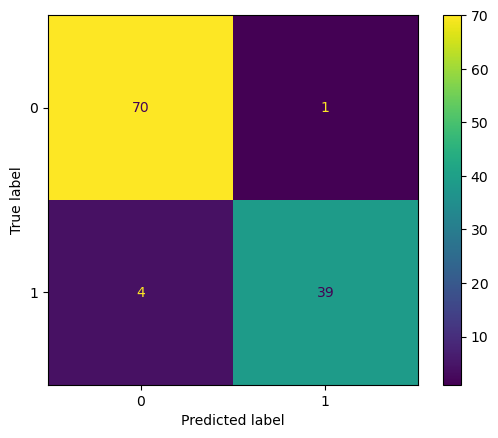

In [27]:
# Heatmap of Confusion matrix
ConfusionMatrixDisplay(confusion_matrix = cm).plot();

<h5>Hyperparameter Tuning</h5>

In [28]:
parameters = {'criterion':['gini', 'entropy'], 'max_depth': [2,1,50,100,500],'max_leaf_nodes' : [10,50,100,500]}
dt = DecisionTreeClassifier()
cv = GridSearchCV(dt, parameters)
cv.fit(X_train_scl, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 1, 50, 100, 500],
                         'max_leaf_nodes': [10, 50, 100, 500]})

In [29]:
# Best Parameters
cv.best_params_

{'criterion': 'entropy', 'max_depth': 100, 'max_leaf_nodes': 500}

In [30]:
# Decision tree Algorithm
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=500,max_leaf_nodes=10, random_state = 42)
dt.fit(X_train_scl, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=500, max_leaf_nodes=10,
                       random_state=42)

In [31]:
#Predicted Values
y_pred_dt = dt.predict(X_test_scl)

In [32]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
cm

array([[69,  2],
       [ 4, 39]])

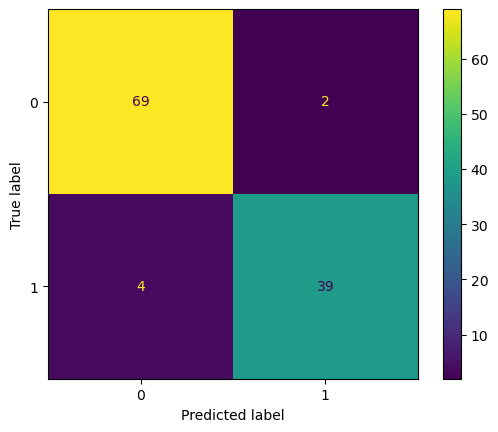

In [33]:
# Heatmap of Confusion matrix
ConfusionMatrixDisplay(confusion_matrix = cm).plot();

<h3>Support Vector Machine</h3>

In [34]:
svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train_scl,y_train)

SVC(kernel='linear')

In [35]:
y_pred_svm = svm_model.predict(X_test_scl)

<h3>Naive-Bayes Classifier</h3>

In [36]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scl, y_train)

GaussianNB()

In [37]:
#Predicted Values
y_pred_nbc = nb_classifier.predict(X_test_scl)

<h3>Model Evaluation Using R^2 Value</h3>

$$R^2 = 1 - \frac{SSE}{SST}$$ where, $SSE$ is the sum of sqaures of error terms and $SST$ is the total squares. Using this, the models' performances are evaluated. Higher the $R^2$ value, better the model performance.

In [38]:
print("R2 Score:")
print("Linear Regression Model:",r2_score(y_test,y_pred_reg))
print("Decision Tree Algorithm:",r2_score(y_test,y_pred_dt))
print("Support Vector Machine:",r2_score(y_test,y_pred_svm))
print("Naive-Bayes Classifier:",r2_score(y_test,y_pred_nbc))

R2 Score:
Linear Regression Model: 0.7137294697890217
Decision Tree Algorithm: 0.7759580740255486
Support Vector Machine: 0.8132983950212905
Naive-Bayes Classifier: 0.8506387160170324


<h3>Accuracy Score</h3>

$$Accuracy Score = \frac{No. of Correct Predictions}{Total No. of Predictions}$$
Accuracy Score tells how accurate the predictions made by the model is.

In [39]:
print("Accuracy Score:")
print("Decision Tree Algorithm is:",accuracy_score(y_test,y_pred_dt))
print("Support Vector Machine:",accuracy_score(y_test,y_pred_svm))
print("Naive-Bayes Classifier:",accuracy_score(y_test,y_pred_nbc))

Accuracy Score:
Decision Tree Algorithm is: 0.9473684210526315
Support Vector Machine: 0.956140350877193
Naive-Bayes Classifier: 0.9649122807017544


<b>Observations:</b><br>
    1. From both R2 Score and Accuracy Score, it is found that Naive-Bayes Classifier showed the best performance.<br>
    2. R2 Score shows that Multiple Linear Regression model had the worst performance of all the models considered.<br>
    3. From both R2 Score and Accuracy Score, it is evident that Decision Tree Algorithm had the worst performance among the remaining three models.<br>
    4. Decreasing order of performance based on R2 Score:<br> 
    <center>Naive-Bayes Classifier > Support Vector Machine > Decision Tree Algorithm > Linear Regression Model</center>
    5. Decreasing order of performance based on Accuracy Score:<br> 
    <center>Naive-Bayes Classifier > Support Vector Machine > Decision Tree Algorithm</center>